In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
train = pd.read_csv("data/Impact_of_Remote_Work_on_Mental_Health.csv")

In [3]:
pd.set_option('display.max_columns', None)
train.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


In [4]:
# Check for null values.

train.isna().sum()

Employee_ID                             0
Age                                     0
Gender                                  0
Job_Role                                0
Industry                                0
Years_of_Experience                     0
Work_Location                           0
Hours_Worked_Per_Week                   0
Number_of_Virtual_Meetings              0
Work_Life_Balance_Rating                0
Stress_Level                            0
Mental_Health_Condition              1196
Access_to_Mental_Health_Resources       0
Productivity_Change                     0
Social_Isolation_Rating                 0
Satisfaction_with_Remote_Work           0
Company_Support_for_Remote_Work         0
Physical_Activity                    1629
Sleep_Quality                           0
Region                                  0
dtype: int64

In [5]:
# Check data types.

train.dtypes

Employee_ID                          object
Age                                   int64
Gender                               object
Job_Role                             object
Industry                             object
Years_of_Experience                   int64
Work_Location                        object
Hours_Worked_Per_Week                 int64
Number_of_Virtual_Meetings            int64
Work_Life_Balance_Rating              int64
Stress_Level                         object
Mental_Health_Condition              object
Access_to_Mental_Health_Resources    object
Productivity_Change                  object
Social_Isolation_Rating               int64
Satisfaction_with_Remote_Work        object
Company_Support_for_Remote_Work       int64
Physical_Activity                    object
Sleep_Quality                        object
Region                               object
dtype: object

In [6]:
# Check for outliers.

# sns.boxplot(data = train,
            # x = "Age", "Years_of_Experience", "Hours_Worked_Per_Week", "Number_of_Virtual_Meetings", "Work_Life_Balance_Rating", "Social_Isolation_Rating", "Company_Support_for_Remote_Work")

# No outliers found.

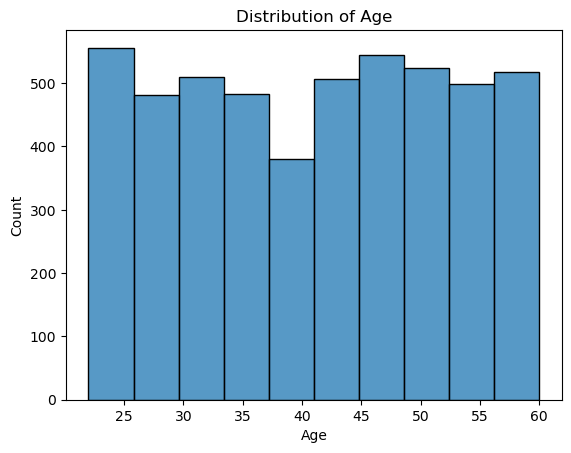

In [7]:
# Age Distribution

sns.histplot(data = train,
             x = "Age",
             bins = 10)
plt.title("Distribution of Age")
plt.xlabel("Age")

plt.savefig("images/plot1.png")

The above histogram displays the distribution of ages among the dataset. The data is evenly distributed throughout the entire range of ages.

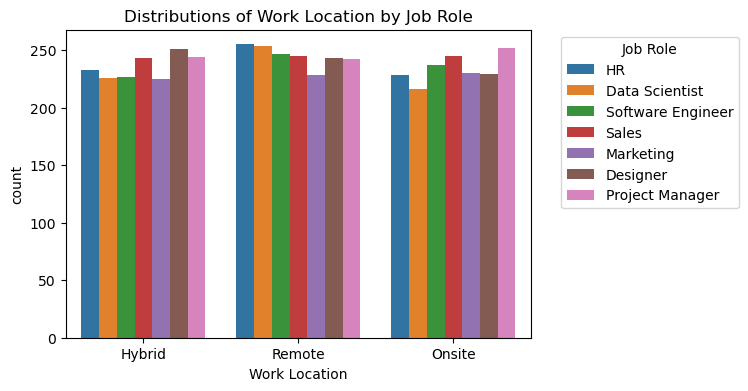

In [9]:
# Bar Graph of Work Location by Job Role

plt.figure(figsize = (6, 4))

sns.countplot(data = train,
              x = "Work_Location",
              hue = "Job_Role")
plt.title("Distributions of Work Location by Job Role")
plt.xlabel("Work Location")
plt.legend(title = "Job Role", bbox_to_anchor = (1.05, 1), loc = "upper left")

plt.savefig("images/plot2.png", bbox_inches = "tight")

The above bar graph displays the distribution of work location by job role. The graph shows that most employees are working remotely, followed by hybrid, and finally onsite with the least amount of employees. The distribution of job roles is evenly distributed within work locations.

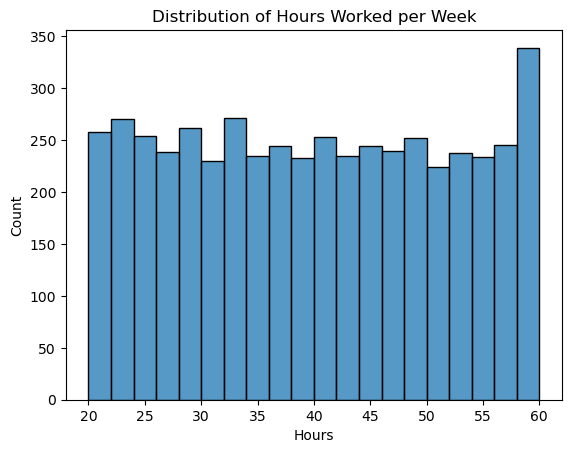

In [11]:
# Hours Worked per Week Distribution

sns.histplot(data = train,
             x = "Hours_Worked_Per_Week",
             bins = 20)
plt.title("Distribution of Hours Worked per Week")
plt.xlabel("Hours")

plt.savefig("images/plot3.png")

The histogram above shows the distribution of hours worked per week within the dataset, with the data evenly spread across most hours with a slight uptick near 60 hours worked per week.

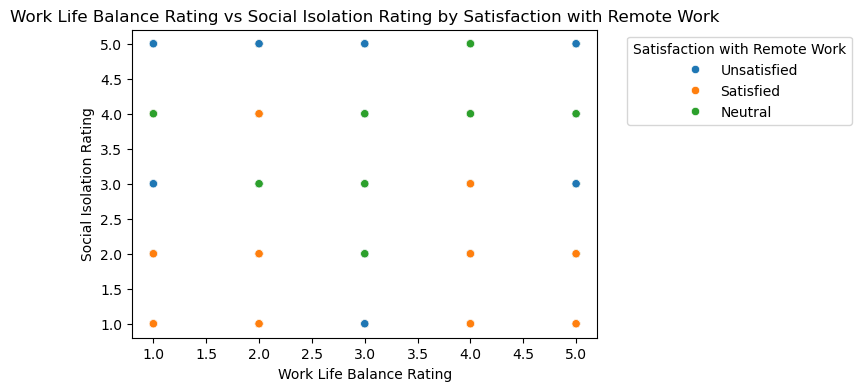

In [13]:
# Scatterplot of Work Life Balance Rating vs Social Isolation Rating

plt.figure(figsize = (6, 4))

sns.scatterplot(data = train,
               x = "Work_Life_Balance_Rating",
               y = "Social_Isolation_Rating",
               hue = "Satisfaction_with_Remote_Work")

plt.title("Work Life Balance Rating vs Social Isolation Rating by Satisfaction with Remote Work")
plt.xlabel("Work Life Balance Rating")
plt.ylabel("Social Isolation Rating")
plt.legend(title = "Satisfaction with Remote Work", bbox_to_anchor = (1.05, 1), loc = "upper left")

plt.savefig("images/plot4.png", bbox_inches = "tight")

The above scatterplot displays the relationship between work life balance rating and social isolation rating by satisfaction with remote work. Although the data is scattered, there is a general trend associated with unsatisfied with remote work and a high social isolation rating along with a cluster of employees that rate their work life balance highly with a low social isolation rating being satisfied with remote work.

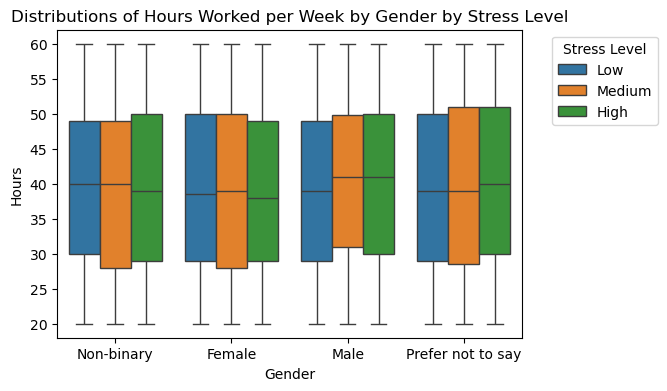

In [15]:
# Boxplots of Hours Worked per Week by Gender

plt.figure(figsize = (6, 4))

stress_order = ["Low", "Medium", "High"]

sns.boxplot(data = train,
           x = "Gender",
           y = "Hours_Worked_Per_Week",
           hue = "Stress_Level",
           hue_order = stress_order)
plt.title("Distributions of Hours Worked per Week by Gender by Stress Level")
plt.xlabel("Gender")
plt.ylabel("Hours")
plt.legend(title = "Stress Level", bbox_to_anchor = (1.05, 1), loc = "upper left")

plt.savefig("images/plot5.png", bbox_inches = "tight")

The side-by-side boxplots above illustrate the distribution of hours worked per week by gender and stress level. The data reveals that men tend to work more hours on average each week, with a significant number reporting medium to high stress levels.

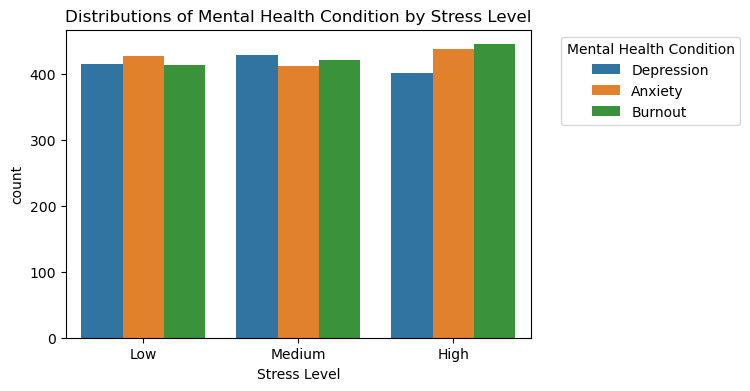

In [17]:
# Bar Graph of Stress Level by Mental Health Condition

plt.figure(figsize = (6, 4))

stress_order = ["Low", "Medium", "High"]

sns.countplot(data = train,
              x = "Stress_Level",
              hue = "Mental_Health_Condition",
              order = stress_order)
plt.title("Distributions of Mental Health Condition by Stress Level")
plt.xlabel("Stress Level")
plt.legend(title = "Mental Health Condition", bbox_to_anchor = (1.05, 1), loc = "upper left")

plt.savefig("images/plot6.png", bbox_inches = "tight")

The above bar graph displays the distribution of employees' stress levels by mental health condition. The graph shows that as employees' stress increases, their burnout and anxiety also increases.

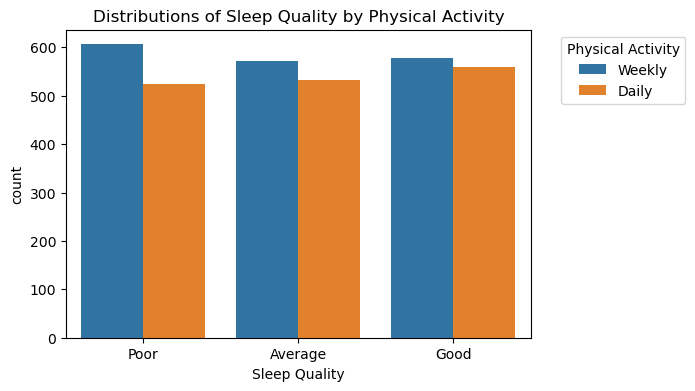

In [20]:
# Bar Graph of Sleep Quality by Physical Activity

plt.figure(figsize = (6, 4))

sleep_order = ["Poor", "Average", "Good"]

sns.countplot(data = train,
              x = "Sleep_Quality",
              hue = "Physical_Activity",
              order = sleep_order)
plt.title("Distributions of Sleep Quality by Physical Activity")
plt.xlabel("Sleep Quality")
plt.legend(title = "Physical Activity", bbox_to_anchor = (1.05, 1), loc = "upper left")

plt.savefig("images/plot7.png", bbox_inches = "tight")

The above bar graph displays the distribution of employees' sleep quality by physical activity. The graph shows that most employees get poor sleep.

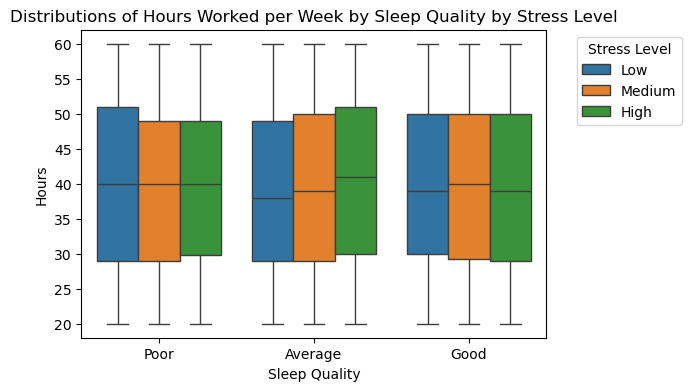

In [35]:
# Boxplots of Hours Worked per Week by Sleep Quality

plt.figure(figsize = (6, 4))

sleep_order = ["Poor", "Average", "Good"]

stress_order = ["Low", "Medium", "High"]

sns.boxplot(data = train,
           x = "Sleep_Quality",
           y = "Hours_Worked_Per_Week",
           hue = "Stress_Level",
           order = sleep_order,
           hue_order = stress_order)
plt.title("Distributions of Hours Worked per Week by Sleep Quality by Stress Level")
plt.xlabel("Sleep Quality")
plt.ylabel("Hours")
plt.legend(title = "Stress Level", bbox_to_anchor = (1.05, 1), loc = "upper left")

plt.savefig("images/plot8.png", bbox_inches = "tight")

The side-by-side boxplots above illustrate the distribution of hours worked per week by sleep quality and stress level. The data reveals that employees who get an average amount of sleep show having high stress levels over poor and good sleep qualities.

In [109]:
print(train["Gender"].unique())
print(train["Job_Role"].unique())
print(train["Industry"].unique())
print(train["Work_Location"].unique())
print(train["Stress_Level"].unique())
print(train["Mental_Health_Condition"].unique())
print(train["Access_to_Mental_Health_Resources"].unique())
print(train["Productivity_Change"].unique())
print(train["Satisfaction_with_Remote_Work"].unique())
print(train["Physical_Activity"].unique())
print(train["Sleep_Quality"].unique())
print(train["Region"].unique())

['Non-binary' 'Female' 'Male' 'Prefer not to say']
['HR' 'Data Scientist' 'Software Engineer' 'Sales' 'Marketing' 'Designer'
 'Project Manager']
['Healthcare' 'IT' 'Education' 'Finance' 'Consulting' 'Manufacturing'
 'Retail']
['Hybrid' 'Remote' 'Onsite']
['Medium' 'High' 'Low']
['Depression' 'Anxiety' nan 'Burnout']
['No' 'Yes']
['Decrease' 'Increase' 'No Change']
['Unsatisfied' 'Satisfied' 'Neutral']
['Weekly' nan 'Daily']
['Good' 'Poor' 'Average']
['Europe' 'Asia' 'North America' 'South America' 'Oceania' 'Africa']


In [110]:
# Gender Mapping
train["Gender"] = train["Gender"].map({"Male": 0, "Female": 1, "Non-binary": 2, "Prefer not to say": 3})

# Job Role Mapping
train["Job_Role"] = train["Job_Role"].map({"HR": 0, "Data Scientist": 1, "Software Engineer": 2, "Sales": 3, "Marketing": 4, "Designer": 5, "Project Manager": 6})

# Industry Mapping
train["Industry"] = train["Industry"].map({"Healthcare": 0, "IT": 1, "Education": 2, "Finance": 3, "Consulting": 4, "Manufacturing": 5, "Retail": 6})

# Work Location Mapping
train["Work_Location"] = train["Work_Location"].map({"Onsite": 0, "Hybrid": 1, "Remote": 2})

# Stress Level Mapping
train["Stress_Level"] = train["Stress_Level"].map({"Low": 0, "Medium": 1, "High": 2})

# Access to Mental Health Resources Mapping
train["Access_to_Mental_Health_Resources"] = train["Access_to_Mental_Health_Resources"].map({"No": 0, "Yes": 1})

# Productivity Change Mapping
train["Productivity_Change"] = train["Productivity_Change"].map({"Decrease": 0, "Increase": 1, "No Change": 2})

# Satisfaction with Remote Work Mapping
train["Satisfaction_with_Remote_Work"] = train["Satisfaction_with_Remote_Work"].map({"Unsatisfied": 0, "Satisfied": 1, "Neutral": 2})

# Sleep Quality Mapping
train["Sleep_Quality"] = train["Sleep_Quality"].map({"Poor": 0, "Average": 1, "Good": 2})

# Region Mapping
train["Region"] = train["Region"].map({"Europe": 0, "Asia": 1, "North America": 2, "South America": 3, "Oceania": 4, "Africa": 5})

In [111]:
# Replace NaN values with appropriate values.

train["Mental_Health_Condition"] = train["Mental_Health_Condition"].fillna("None")
train["Physical_Activity"] = train["Physical_Activity"].fillna("None")

# Mental Health Condition Mapping

train["Mental_Health_Condition"] = train["Mental_Health_Condition"].map({
    "None": 0,
    "Depression": 1,
    "Anxiety": 2,
    "Burnout": 3
})

# Physical Activity Mapping
train["Physical_Activity"] = train["Physical_Activity"].map({
    "None": 0,
    "Daily": 1,
    "Weekly": 2
})

# Check for NaN values again.
print(train.isna().sum())

Employee_ID                          0
Age                                  0
Gender                               0
Job_Role                             0
Industry                             0
Years_of_Experience                  0
Work_Location                        0
Hours_Worked_Per_Week                0
Number_of_Virtual_Meetings           0
Work_Life_Balance_Rating             0
Stress_Level                         0
Mental_Health_Condition              0
Access_to_Mental_Health_Resources    0
Productivity_Change                  0
Social_Isolation_Rating              0
Satisfaction_with_Remote_Work        0
Company_Support_for_Remote_Work      0
Physical_Activity                    0
Sleep_Quality                        0
Region                               0
dtype: int64


In [112]:
# Drop the Employee_ID column.

train.drop("Employee_ID", axis = 1, inplace = True)

In [113]:
train.to_csv('data/train_cleaned.csv', index = False)

<Axes: >

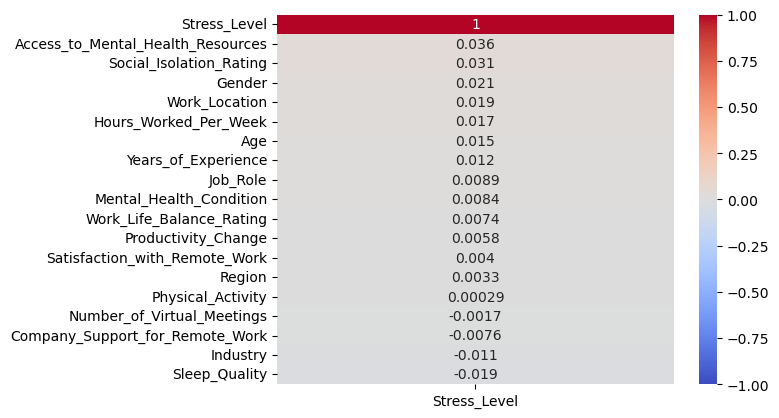

In [114]:
# Heatmap

train_int = train[["Age",
                   "Years_of_Experience",
                   "Hours_Worked_Per_Week",
                   "Number_of_Virtual_Meetings",
                   "Work_Life_Balance_Rating",
                   "Social_Isolation_Rating",
                   "Company_Support_for_Remote_Work",
                   "Gender",
                   "Job_Role",
                   "Industry",
                   "Work_Location",
                   "Stress_Level",
                   "Mental_Health_Condition",
                   "Access_to_Mental_Health_Resources",
                   "Productivity_Change",
                   "Satisfaction_with_Remote_Work",
                   "Physical_Activity",
                   "Sleep_Quality",
                   "Region"]].copy()

sns.heatmap(train_int.corr()[["Stress_Level"]].sort_values(by = "Stress_Level", ascending = False),
           vmin = -1,
           vmax = 1,
           cmap = "coolwarm",
           annot = True)

In [115]:
train["Stress_Level"].value_counts(normalize = True)

Stress_Level
2    0.3372
1    0.3338
0    0.3290
Name: proportion, dtype: float64

> We want to get a model that has a higher accuracy than 32.90%!

In [117]:
X = train.drop(columns = ["Stress_Level"])
y = train["Stress_Level"]

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

In [119]:
sc = StandardScaler()

In [120]:
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [121]:
knn = KNeighborsClassifier()

In [122]:
knn.fit(X_train_sc, y_train)

KNeighborsClassifier()

In [123]:
knn.score(X_train_sc, y_train)

0.5522666666666667

In [124]:
knn.score(X_test_sc, y_test)

0.3416

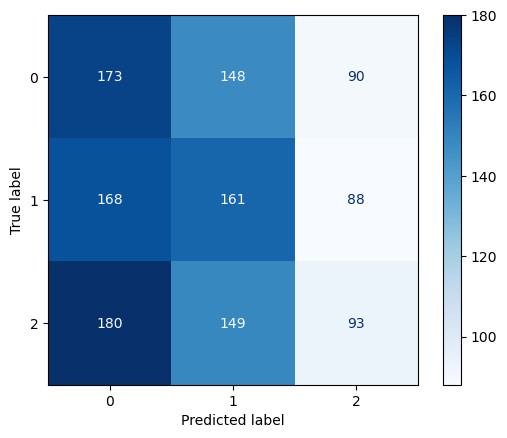

In [125]:
ConfusionMatrixDisplay.from_estimator(knn, X_test_sc, y_test, cmap = "Blues")

In [126]:
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train_sc, y_train)

knn.score(X_test_sc, y_test)

0.3416

In [127]:
scores = []

for k in range(1, 31, 2):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_sc, y_train)
    train_score = knn.score(X_train_sc, y_train)
    test_score = knn.score(X_test_sc, y_test)
    
    scores.append({"k": k, "train_score": train_score, "test_score": test_score})
    
df_score = pd.DataFrame(scores)

([<matplotlib.axis.XTick at 0x1473cf210>,
 [Text(1, 0, '1'),
  Text(3, 0, '3'),
  Text(5, 0, '5'),
  Text(7, 0, '7'),
  Text(9, 0, '9'),
  Text(11, 0, '11'),
  Text(13, 0, '13'),
  Text(15, 0, '15'),
  Text(17, 0, '17'),
  Text(19, 0, '19'),
  Text(21, 0, '21'),
  Text(23, 0, '23'),
  Text(25, 0, '25'),
  Text(27, 0, '27'),
  Text(29, 0, '29')])

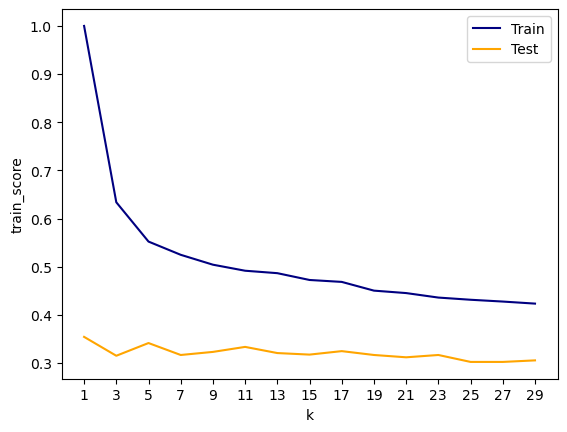

In [128]:
sns.lineplot(data = df_score, x = "k", y = "train_score", c = "navy", label = "Train")
sns.lineplot(data = df_score, x = "k", y = "test_score", c = "orange", label = "Test")
plt.xticks(range(1, 31, 2))

In [129]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train_sc, y_train)

KNeighborsClassifier(n_neighbors=1)

In [130]:
knn.score(X_train_sc, y_train)

1.0

In [131]:
knn.score(X_test_sc, y_test)

0.3544

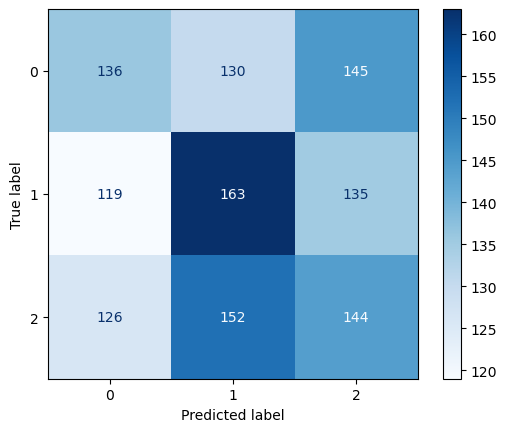

In [132]:
ConfusionMatrixDisplay.from_estimator(knn, X_test_sc, y_test, cmap = "Blues")

In [133]:
from sklearn.linear_model import LogisticRegression

In [134]:
logr = LogisticRegression()
logr.fit(X_train_sc, y_train)

LogisticRegression()

In [135]:
logr.score(X_train_sc, y_train)

0.372

In [136]:
logr.score(X_test_sc, y_test)

0.3448

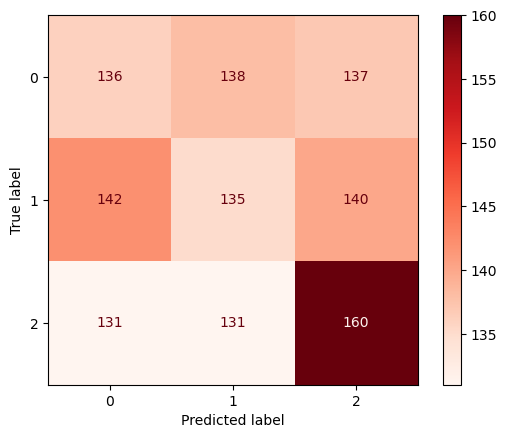

In [137]:
ConfusionMatrixDisplay.from_estimator(logr, X_test_sc, y_test, cmap = 'Reds');

In [138]:
from sklearn.ensemble import RandomForestClassifier

In [139]:
rf = RandomForestClassifier()
rf.fit(X_train_sc, y_train)

RandomForestClassifier()

In [140]:
rf.score(X_train_sc, y_train)

1.0

In [141]:
rf.score(X_test_sc, y_test)

0.3272

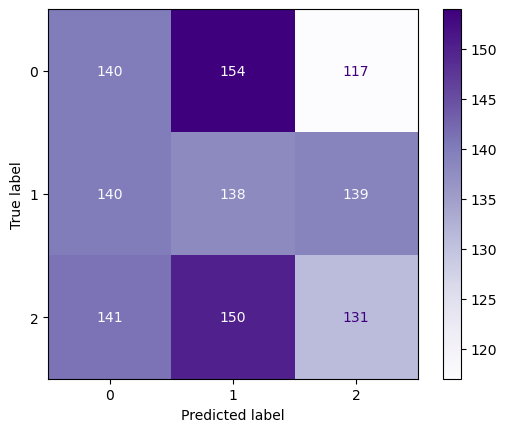

In [142]:
ConfusionMatrixDisplay.from_estimator(rf, X_test_sc, y_test, cmap = 'Purples');